In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet2d',
           discriminator='cnnplus',
           filter_num=[16, 32, 64, 128, 256, 512],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           output_activation='Sigmoid',
           batch_norm=True,
           pool=True,
           unpool=False,
           weights='imagenet',
           optimizer=None, # default is optimizers.Adam(learning_rate=1e-3)
           loss=None, # default is losses.binary_crossentropy
           metric=None # default is Util.dice_coef           
          )

*** GP2  KUNet2D ***
Working directory: /tmp/tmp8ugz7xnzGP2
Using  discriminator (CNN+)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

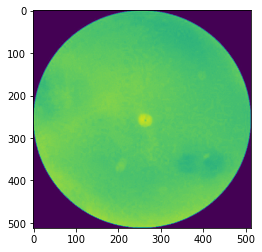

In [5]:
imshow(images[0])

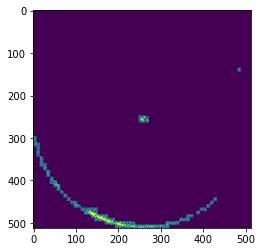

In [6]:
imshow(masks[0])

In [7]:
images = images[:6392]

In [8]:
masks = masks[:6392]

In [9]:
images.shape

(6392, 512, 512, 1)

In [10]:
masks.shape

(6392, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 29s 4s/step - loss: 0.5991 - dice_coeff: 0.4826 - val_loss: 4.3573 - val_dice_coeff: 0.3467
Epoch 2/100
5/5 [==============================] - 6s 1s/step - loss: 0.4129 - dice_coeff: 0.5924 - val_loss: 12.0997 - val_dice_coeff: 0.3183
Epoch 3/100
5/5 [==============================] - 6s 1s/step - loss: 0.3534 - dice_coeff: 0.6257 - val_loss: 12.2535 - val_dice_coeff: 0.3181
Epoch 4/100
5/5 [==============================] - 6s 1s/step - loss: 0.3296 - dice_coeff: 0.6431 - val_loss: 12.2591 - val_dice_coeff: 0.3181
Epoch 5/100
5/5 [==============================] - 6s 1s/step - loss: 0.3148 - dice_coeff: 0.6442 - val_loss: 12.2291 - val_dice_coeff: 0.3183
Epoch 6/100
5/5 [==============================] - 6s 1s/step - loss: 0.3046 - dice_coeff: 0.6529 - val_loss: 12.1501 - val_dice_coeff: 0.3189
Epoch 7/100
5/5 [==============================] - 6s 1s/step - loss: 0.2925 - dice_coeff: 0.6596 - val_loss: 11.980

In [13]:
R.classifier_scores

[[8.305166244506836, 0.35079461336135864],
 [6.966326713562012, 0.36800336837768555],
 [0.41359665989875793, 0.6110384464263916]]

In [14]:
R.discriminator_scores

[[5.386044979095459, 0.6292428374290466],
 [2.280433177947998, 0.8825065493583679],
 [55.15788650512695, 0.5117493271827698]]

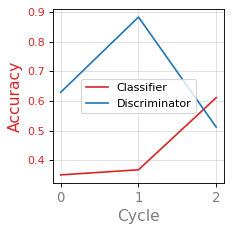

In [15]:
R.plot()